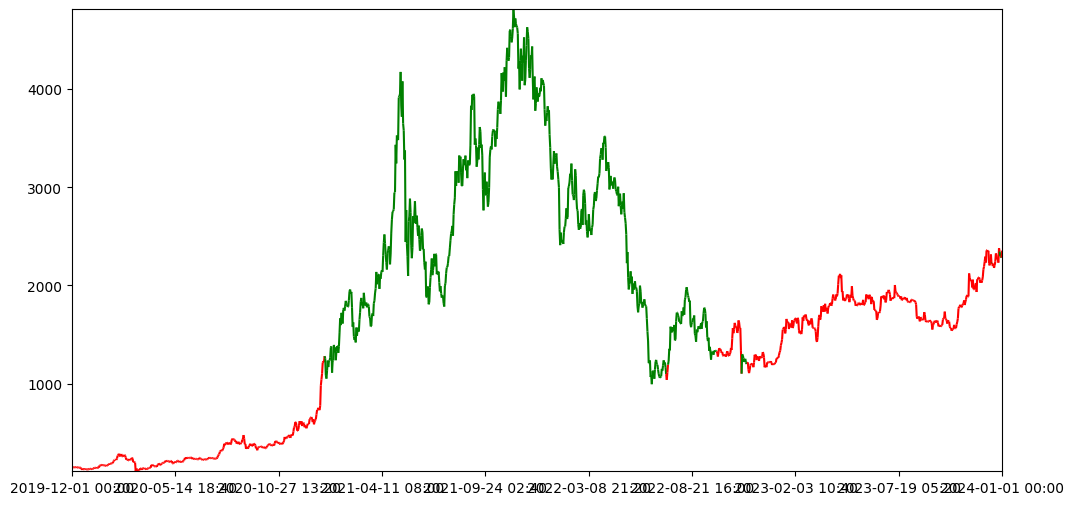

In [2]:
## 3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection



df = pd.read_csv(f'data/ETH/ETHUSDT_1d.csv')


# Constant Thresholding using ATR
atr_num = 14
df["H-L"] = df["high"] - df["low"]
df["H-PC"] = abs(df["high"] - df["close"].shift(1))
df["L-PC"] = abs(df["low"] - df["close"].shift(1))
df["TR"] = df[["H-L","H-PC","L-PC"]].max(axis=1, skipna=False)
df["ATR"] = df["TR"].ewm(com=atr_num, min_periods=atr_num).mean()


df['Normalized_ATR'] = df['ATR'] / df['close']
df["Constant_Val"]= np.where(df['ATR']>100, 1, -1)



# df['ATR_percentile_up'] = df['ATR'].rolling(12).quantile(0.65)
# df['ATR_percentile_down'] = df['ATR'].rolling(12).quantile(0.15)
# df["Percentile_Val"]= np.where(df['ATR']>df['ATR_percentile_up'], 1, np.where(df['ATR']<df['ATR_percentile_down'], -1, 0))


# df['ATR_norm_percentile_up'] = df['Normalized_ATR'].rolling(atr_window).quantile(0.80)
# df['ATR_norm_percentile_down'] = df['Normalized_ATR'].rolling(atr_window).quantile(0.20)
# df["Norm_Percentile_Val"]= np.where(df['Normalized_ATR']>=df['ATR_norm_percentile_up'], 1, np.where(df['Normalized_ATR']<=df['ATR_norm_percentile_down'], -1, 0))


# df.to_csv('abc.csv', index=False)

# plt.figure(figsize=(12, 6))

# for i in range(len(df) - 1):
#     # Determine the color based on the current row's 'val' value
#     # color = 'green' if df.iloc[i]['Percentile_Val'] == 1 else 'red'
#     color = (
#         'green' 
#         if df.iloc[i]['Constant_Val'] == 1 
#         else 'red' 
#         if df.iloc[i]['Constant_Val'] == -1 
#         else 'blue'
#     )
    
#     # Plot a line segment between consecutive points
#     plt.plot(
#         [df.iloc[i]['datetime'], df.iloc[i + 1]['datetime']],
#         [df.iloc[i]['close'], df.iloc[i + 1]['close']],
#         color=color
#     )

# # Add labels, legend, and title
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title('Close Price with Buy/Sell Signals')
# # plt.legend()
# plt.grid()

# # Show the plot
# plt.show()

# # Plot the Dynamic Threshold
# plt.figure(figsize=(12, 6))

# for i in range(len(df) - 1):
#     # Determine the color based on the current row's 'val' value
#     # color = 'green' if df.iloc[i]['Percentile_Val'] == 1 else 'red'
#     color = (
#         'green' 
#         if df.iloc[i]['Percentile_Val'] == 1 
#         else 'red' 
#         if df.iloc[i]['Percentile_Val'] == -1 
#         else 'blue'
#     )
    
#     # Plot a line segment between consecutive points
#     plt.plot(
#         [df.iloc[i]['datetime'], df.iloc[i + 1]['datetime']],
#         [df.iloc[i]['close'], df.iloc[i + 1]['close']],
#         color=color
#     )

# # Add labels, legend, and title
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title('Close Price with Buy/Sell Signals')
# # plt.legend()
# plt.grid()

# # Show the plot
# plt.show()


#  Ensure datetime column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Convert datetime to numerical format (matplotlib requires numerical x-values)
df['datetime_num'] = df['datetime'].map(pd.Timestamp.timestamp)

# Prepare line segments
segments = [
    [(df.iloc[i]['datetime_num'], df.iloc[i]['close']), 
     (df.iloc[i + 1]['datetime_num'], df.iloc[i + 1]['close'])]
    for i in range(len(df) - 1)
]

# Assign colors based on 'Percentile_Val'
colors = np.where(df['Constant_Val'][:-1] == 1, 'green', 
         np.where(df['Constant_Val'][:-1] == -1, 'red', 'blue'))

# Create LineCollection
lc = LineCollection(segments, colors=colors, linewidths=1.5)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.add_collection(lc)

# Set axis limits
ax.set_xlim(df['datetime_num'].min(), df['datetime_num'].max())
ax.set_ylim(df['close'].min(), df['close'].max())

# Format x-axis back to readable datetime
ax.set_xticks(np.linspace(df['datetime_num'].min(), df['datetime_num'].max(), 10))
ax.set_xticklabels(pd.to_datetime(ax.get_xticks(), unit='s').strftime('%Y-%m-%d %H:%M'))

# Show plot
plt.show()

# # Plot the Dynamic Normalized Threshold
# plt.figure(figsize=(12, 6))

# for i in range(len(df) - 1):
#     # Determine the color based on the current row's 'val' value
#     # color = 'green' if df.iloc[i]['Norm_Percentile_Val'] == 1 else 'red'
#     color = (
#         'green' 
#         if df.iloc[i]['Norm_Percentile_Val'] == 1 
#         else 'red' 
#         if df.iloc[i]['Norm_Percentile_Val'] == -1 
#         else 'blue'
#     )
    
    
#     # Plot a line segment between consecutive points
#     plt.plot(
#         [df.iloc[i]['datetime'], df.iloc[i + 1]['datetime']],
#         [df.iloc[i]['close'], df.iloc[i + 1]['close']],
#         color=color
#     )

# # Add labels, legend, and title
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title('Close Price with Buy/Sell Signals')
# # plt.legend()
# plt.grid()

# # Show the plot
# plt.show()


In [144]:
from hmmlearn.hmm import GaussianHMM
import pandas as pd
import numpy as np
# Load data
df = pd.read_csv('data/BTC/BTC_2019_2021_3d.csv')

# Calculate log returns and volatility
# df['log_return'] = np.log(df['close'] / df['close'].shift(1)) 
# df['volatility'] = df['log_return'].rolling(window=7).std()
# df = df.dropna()

atr_num = 14
df["H-L"] = df["high"] - df["low"]
df["H-PC"] = abs(df["high"] - df["close"].shift(1))
df["L-PC"] = abs(df["low"] - df["close"].shift(1))
df["TR"] = df[["H-L","H-PC","L-PC"]].max(axis=1, skipna=False)
df["ATR"] = df["TR"].ewm(com=atr_num, min_periods=atr_num).mean()

df['log_return'] = df['close'] - df['close'].shift(1)

# Calculate rolling standard deviation
df['volatility'] = df['log_return'].rolling(window=7).std()

df.to_csv('b.csv', index=False)
# Drop NaN values
df = df.dropna(subset=['volatility'], how='any')
# Standardize features

features = df[['volatility']]
features = (features - features.mean()) / features.std()



# Train the HMM model
n_hidden_states = 2
hmm_model = GaussianHMM(n_components=n_hidden_states, covariance_type='full', n_iter=2000, random_state=42)
hmm_model.fit(features)

# Predict hidden states
df['regime'] = hmm_model.predict(features)

# Group by hidden states and calculate statistics
state_summary = df.groupby('regime').agg(
    count=('regime', 'size'),
    mean_ATR=('ATR', 'mean'),
    mean_volatility=('volatility', 'mean')
).reset_index()

# Display the results
print(state_summary)

# Get transition probabilities
print(hmm_model.transmat_)

   regime  count     mean_ATR  mean_volatility
0       0    153   907.932000       515.940692
1       1    124  5096.935443      2969.261046
[[0.98687697 0.01312303]
 [0.00811169 0.99188831]]


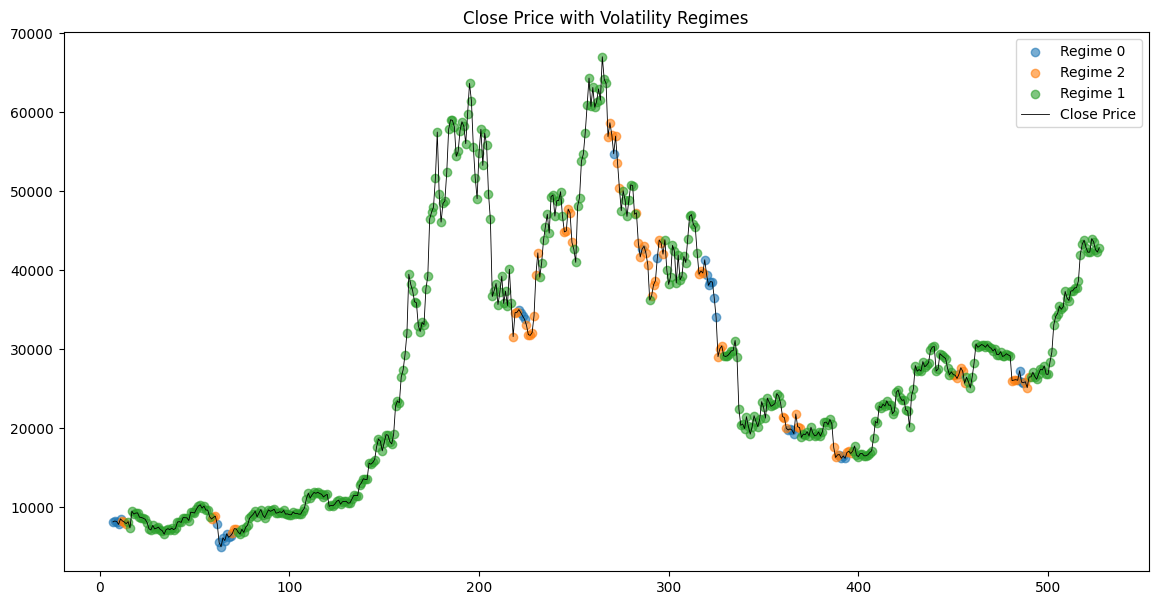

In [145]:
import matplotlib.pyplot as plt
# Load data
df = pd.read_csv('data/BTC/BTC_2019_2023_3d.csv')

atr_num = 14
df["H-L"] = df["high"] - df["low"]
df["H-PC"] = abs(df["high"] - df["close"].shift(1))
df["L-PC"] = abs(df["low"] - df["close"].shift(1))
df["TR"] = df[["H-L","H-PC","L-PC"]].max(axis=1, skipna=False)
df["ATR"] = df["TR"].ewm(com=atr_num, min_periods=atr_num).mean()

df['log_return'] = df['close'] - df['close'].shift(1)

# Calculate rolling standard deviation
df['volatility'] = df['log_return'].rolling(window=7).mean()

# Calculate absolute returns
df['abs_return'] = df['log_return'].abs()

# Drop NaN values
df = df.dropna(subset=['volatility'], how='any')
# Standardize features

features = df[['volatility']]
features = (features - features.mean()) / features.std()




# # Calculate features
# df['log_return'] = np.log(df['close'] / df['close'].shift(1))
# df['volatility'] = df['log_return'].rolling(window=7).std()
# df = df.dropna()

# # Prepare features for HMM
# features = df[['log_return', 'volatility']].values

# Predict hidden states
df['regime'] = hmm_model.predict(features)

rolling_sum = df['regime'].rolling(window=4, min_periods=1).sum()


df['regime'] = np.where(rolling_sum == 4, 1, np.where(rolling_sum == 0, 0, 2))

plt.figure(figsize=(14, 7))
for regime in df['regime'].unique():
    subset = df[df['regime'] == regime]
    plt.scatter(subset.index, subset['close'], label=f'Regime {regime}', alpha=0.6)

plt.plot(df.index, df['close'], color='black', linewidth=0.6, label='Close Price')
plt.legend()
plt.title('Close Price with Volatility Regimes')
plt.show()
